## Observations and Insights 

In [353]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceutical_df = pd.merge(mouse_metadata_df, study_results_df, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview


In [354]:
pymaceutical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1893 non-null   object 
 1   Drug Regimen         1893 non-null   object 
 2   Sex                  1893 non-null   object 
 3   Age_months           1893 non-null   int64  
 4   Weight (g)           1893 non-null   int64  
 5   Timepoint            1893 non-null   int64  
 6   Tumour Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites     1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [355]:
pymaceutical_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [356]:
mice_count = len(pymaceutical_df["Mouse ID"].unique())
mice_count

249

In [357]:
pymaceutical_df["Mouse ID"].nunique()

249

In [358]:
# Checking the number of mice.
pymaceutical_df["Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [359]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df=pymaceutical_df.loc[pymaceutical_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [360]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_subset_df=pymaceutical_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
data_subset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [361]:
# Checking the number of mice in the clean DataFrame.
data_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1888 non-null   object 
 1   Drug Regimen         1888 non-null   object 
 2   Sex                  1888 non-null   object 
 3   Age_months           1888 non-null   int64  
 4   Weight (g)           1888 non-null   int64  
 5   Timepoint            1888 non-null   int64  
 6   Tumour Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites     1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [362]:
data_subset_df["Mouse ID"].nunique()

249

## Summary Statistics

In [363]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

In [364]:
data_subset_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [365]:
data_subset_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [366]:
summary_statistic_start_df= data_subset_df[["Drug Regimen","Tumour Volume (mm3)"]]
summary_statistic_start_df.info

<bound method DataFrame.info of      Drug Regimen  Tumour Volume (mm3)
0        Ramicane            45.000000
1        Ramicane            38.825898
2        Ramicane            35.014271
3        Ramicane            34.223992
4        Ramicane            32.997729
...           ...                  ...
1888     Naftisol            63.145652
1889     Naftisol            65.841013
1890     Naftisol            69.176246
1891     Naftisol            70.314904
1892     Naftisol            73.867845

[1888 rows x 2 columns]>

In [367]:
summary_statistics_group_df = summary_statistic_start_df.groupby(["Drug Regimen"])
summary_statistics_group_df

In [368]:
mean_df = summary_statistics_group_df.mean()
mean_df = mean_df.rename(columns={"Tumour Volume (mm3)":"Mean Tumour Volume"})
mean_df

,Mean Tumour Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [369]:
median_df =summary_statistics_group_df.median()
median_df = median_df.rename(columns={"Tumour Volume (mm3)":"Median Tumour Volume"})
median_df

,Median Tumour Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [370]:
variance_df = summary_statistics_group_df.var()
variance_df = variance_df.rename(columns={"Tumour Volume (mm3)":"Tumour Volume Variance"})
variance_df

,Tumour Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [371]:
std_df = summary_statistics_group_df.std()
std_df = std_df.rename(columns={"Tumour Volume (mm3)":"Tumour Volume Std. Dev."})
std_df

,Tumour Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [372]:
SEM_df = summary_statistics_group_df.sem()
SEM_df = SEM_df.rename(columns={"Tumour Volume (mm3)":"Tumour Volume Std. Err."})
SEM_df

,Tumour Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [373]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
summary_statistics_df = pd.DataFrame({"Mean Tumour Volume":mean_df["Mean Tumour Volume"],
                              "Median Tumour Volume":median_df["Median Tumour Volume"],
                              "Tumour Volume Variance":variance_df["Tumour Volume Variance"],
                              "Tumour Volume Std. Dev.":std_df["Tumour Volume Std. Dev."],
                              "Tumour Volume Std. Err.":SEM_df["Tumour Volume Std. Err."]})
summary_statistics_df

,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [374]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_df = pymaceutical_df.groupby("Drug Regimen").agg({"Tumour Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_df

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [375]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [376]:
data_subset_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [377]:
data_subset_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [378]:
bar_df= data_subset_df[["Drug Regimen", "Timepoint"]]
bar_df

,Drug Regimen,Timepoint
0,Ramicane,0
1,Ramicane,5
2,Ramicane,10
3,Ramicane,15
4,Ramicane,20
...,...,...
1888,Naftisol,25
1889,Naftisol,30
1890,Naftisol,35
1891,Naftisol,40


In [379]:
bar_subset_df = bar_df.groupby(["Drug Regimen"])
# bar_subset_df["Timepoint"].valucount()
bar_subset_df

In [380]:
timepoints = bar_subset_df["Timepoint"].count()
timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [381]:
total_timepoints_df = pd.DataFrame(timepoints)
total_timepoints_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [382]:
drug_regimen = list(total_timepoints_df.index.values)
drug_regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [383]:
list(total_timepoints_df["Timepoint"])

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [384]:
drug_regimen = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
total_no_timepoints = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = np.arange(len(drug_regimen))

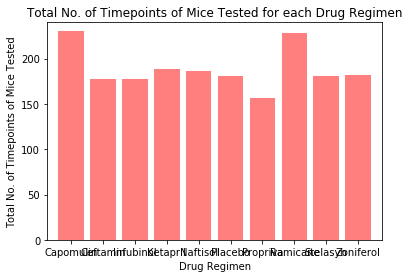

In [385]:
plt.bar(drug_regimen, total_no_timepoints, color='r', alpha=0.5, align="center")
plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(0, max(total_no_timepoints)+10)
plt.title("Total No. of Timepoints of Mice Tested for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total No. of Timepoints of Mice Tested")
plt.show()

In [386]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [401]:
sex_mice_df = data_subset_df[["Mouse ID","Sex"]]
sex_mice_df.head()

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male


In [403]:
sex_male = sex_mice_df.loc[(sex_mice_df["Sex"] == "Male")]
sex_male.count()

Mouse ID    958
Sex         958
dtype: int64

In [404]:
sex_female = sex_mice_df.loc[(sex_mice_df["Sex"] == "Female")]
sex_female.count()

Mouse ID    930
Sex         930
dtype: int64

(-1.1032653842934317,
 1.1062424936743747,
 -1.1053783266922992,
 1.1002561107948714)

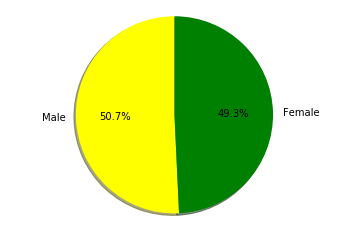

In [411]:
name = ["Male", "Female"]
number = [958, 930]
colours = ["yellow", "green"]

plt.pie(number, labels=name, colors=colours, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")


In [388]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [389]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [390]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [391]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [392]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [393]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [394]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
